In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
import os
from PIL import Image

In [ ]:
# Function to add noise to images
def add_noise(images, noise_factor=0.4):
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    noisy_images = np.clip(noisy_images, 0.0, 1.0)
    return noisy_images


In [ ]:
# Create a simple autoencoder model
def create_autoencoder_model():
    input_img = Input(shape=(128, 128, 3))

    # Encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')

    return autoencoder

In [ ]:
# Update this function to suit your image loading and preprocessing logic
def load_and_preprocess_image(image_path):
    img = Image.open(image_path)
    img = np.array(img) / 255.0  # Normalize pixel values
    return img

In [ ]:
# Define the directory where your images are located
image_dir = "/content/drive/MyDrive/DL_Project/fl_dt/hr_images_1"
image_paths = os.listdir(image_dir)

In [ ]:
# Preprocess and load images from the specified directory
images = []
for image_name in image_paths:
    image_path = os.path.join(image_dir, image_name)
    img = load_and_preprocess_image(image_path)
    images.append(img)

In [ ]:
# Convert the list of images to a NumPy array
images = np.array(images)

# Add noise to the images
noisy_images = add_noise(images)

# Create and train the autoencoder
autoencoder = create_autoencoder_model()
autoencoder.fit(noisy_images, images, epochs=10, batch_size=5, shuffle=True)

# Denoise a specific image (for example, the first image)
denoised_image = autoencoder.predict(np.expand_dims(noisy_images[0], axis=0))

Epoch 1/10
120/120 [==============================] - 13s 8ms/step - loss: 0.0307
Epoch 2/10
120/120 [==============================] - 1s 7ms/step - loss: 0.0133
Epoch 3/10
120/120 [==============================] - 1s 6ms/step - loss: 0.0121
Epoch 4/10
120/120 [==============================] - 1s 6ms/step - loss: 0.0116
Epoch 5/10
120/120 [==============================] - 1s 7ms/step - loss: 0.0110
Epoch 6/10
120/120 [==============================] - 1s 6ms/step - loss: 0.0107
Epoch 7/10
120/120 [==============================] - 1s 6ms/step - loss: 0.0105
Epoch 8/10
120/120 [==============================] - 1s 7ms/step - loss: 0.0103
Epoch 9/10
120/120 [==============================] - 1s 7ms/step - loss: 0.0100
Epoch 10/10
1/1 [==============================] - 0s 311ms/step


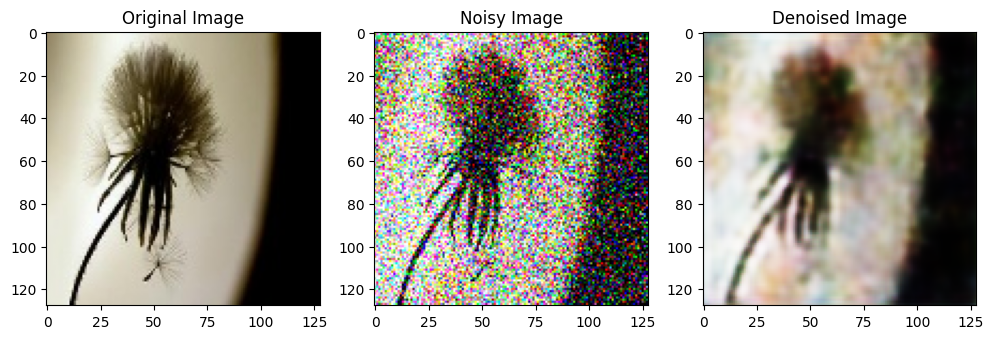

In [ ]:
# Display the original, noisy, and denoised images
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(images[0])

plt.subplot(1, 3, 2)
plt.title("Noisy Image")
plt.imshow(noisy_images[0])

plt.subplot(1, 3, 3)
plt.title("Denoised Image")
plt.imshow(denoised_image[0])

plt.show()

In [ ]:
autoencoder.save("/content/drive/MyDrive/DL_Project/autoencoder_model_128.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
